## Learn pySpark using jupyter

In [ ]:
myRDD = sc.parallelize([('Ross', 19), ('Joey', 18), ('Rachel', 17)])

In [4]:
myRDD.take(3)

[('Ross', 19), ('Joey', 18), ('Rachel', 17)]

In [8]:
df = spark.read.json("file:///Users/Neeraj/Documents/Proj/Spark/data/flight-data/json/2015-summary.json")

In [10]:
df.createOrReplaceTempView("some_sql_view")

In [11]:
spark.sql("""
SELECT DEST_COUNTRY_NAME, sum(count)
FROM some_sql_view GROUP BY DEST_COUNTRY_NAME
""")\
  .where("DEST_COUNTRY_NAME like 'S%'").where("`sum(count)` > 10")\
  .count()

12

In [30]:
myrange = spark.range(10,30).toDF("number")
myrange.show(5)

+------+
|number|
+------+
|    10|
|    11|
|    12|
|    13|
|    14|
+------+
only showing top 5 rows



In [31]:
divby2 = myrange.where("number%2 = 0")
divby2.show(5)

+------+
|number|
+------+
|    10|
|    12|
|    14|
|    16|
|    18|
+------+
only showing top 5 rows



In [32]:
#myrange.show(5)
myrange.select(myrange["number"] + 1).collect()

[Row((number + 1)=11),
 Row((number + 1)=12),
 Row((number + 1)=13),
 Row((number + 1)=14),
 Row((number + 1)=15),
 Row((number + 1)=16),
 Row((number + 1)=17),
 Row((number + 1)=18),
 Row((number + 1)=19),
 Row((number + 1)=20),
 Row((number + 1)=21),
 Row((number + 1)=22),
 Row((number + 1)=23),
 Row((number + 1)=24),
 Row((number + 1)=25),
 Row((number + 1)=26),
 Row((number + 1)=27),
 Row((number + 1)=28),
 Row((number + 1)=29),
 Row((number + 1)=30)]

In [62]:
# load a json file into dataframe
df = spark.read.format("json").load("file:///Users/Neeraj/Documents/Proj/Spark/data/flight-data/json/2015-summary.json")

#note that it will infer the schema automatically for json
df

DataFrame[DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string, count: bigint]

In [39]:
# access same file from hdfs
df = spark.read.format("json").load("/data/json/2015-summary.json")

In [63]:
# lets peek few records
df.show(2)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|   15|
|    United States|            Croatia|    1|
+-----------------+-------------------+-----+
only showing top 2 rows



In [36]:
# we can print schema of a dataframe as
df.printSchema()

root
 |-- DEST_COUNTRY_NAME: string (nullable = true)
 |-- ORIGIN_COUNTRY_NAME: string (nullable = true)
 |-- count: long (nullable = true)



In [37]:
# get schema as structure
df.schema

StructType(List(StructField(DEST_COUNTRY_NAME,StringType,true),StructField(ORIGIN_COUNTRY_NAME,StringType,true),StructField(count,LongType,true)))

In [51]:
# create custom schema
from pyspark.sql.types import StructType, StructField, StringType, LongType
mySchema = StructType(
    [
        StructField("dest", StringType(), True),
        StructField("orig", StringType(), True),
        StructField("count", LongType(), False, metadata={"type":"airports-count"})
    ]
)

#use this schema while importing data
df = spark.read.format("json").schema(mySchema).load("file:///Users/Neeraj/Documents/Proj/Spark/data/flight-data/json/2015-summary.json")
df.printSchema()
df.schema
df.show(3)

root
 |-- dest: string (nullable = true)
 |-- orig: string (nullable = true)
 |-- count: long (nullable = true)

+----+----+-----+
|dest|orig|count|
+----+----+-----+
|null|null|   15|
|null|null|    1|
|null|null|  344|
+----+----+-----+
only showing top 3 rows



In [64]:
from pyspark.sql.functions import col, column
df.columns
df.column("count")

AttributeError: 'DataFrame' object has no attribute 'column'

In [65]:
df.first()

Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Romania', count=15)

In [80]:
df["count"]
df.DEST_COUNTRY_NAME

Column<b'DEST_COUNTRY_NAME'>

In [108]:
from pyspark.sql import Row
from pyspark.sql.types import StructType, StructField, StringType, LongType

myschema = StructType([
    StructField("Fname", StringType(), False),
    StructField("Lname", StringType(), True),
    StructField("age", LongType(), False)
])

myRow1 = Row("Peter",None,30)
myRow2 = Row("John", "Smith", 20)

# create a df from row
mydf = spark.createDataFrame([myRow1, myRow2], myschema)
mydf.printSchema()
mydf.show()

root
 |-- Fname: string (nullable = false)
 |-- Lname: string (nullable = true)
 |-- age: long (nullable = false)

+-----+-----+---+
|Fname|Lname|age|
+-----+-----+---+
|Peter| null| 30|
| John|Smith| 20|
+-----+-----+---+



In [91]:
# create temp table
df.createOrReplaceTempView("dfTable")

In [112]:
# select expressions
df.select("DEST_COUNTRY_NAME", "ORIGIN_COUNTRY_NAME").show(2)

+-----------------+-------------------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|
+-----------------+-------------------+
|    United States|            Romania|
|    United States|            Croatia|
+-----------------+-------------------+
only showing top 2 rows



In [114]:
df.select(col("DEST_COUNTRY_NAME")).show(1)

+-----------------+
|DEST_COUNTRY_NAME|
+-----------------+
|    United States|
+-----------------+
only showing top 1 row



In [117]:
df.select(df["DEST_COUNTRY_NAME"]).show(1)

+-----------------+
|DEST_COUNTRY_NAME|
+-----------------+
|    United States|
+-----------------+
only showing top 1 row



In [119]:
from pyspark.sql.functions import expr
df.select(expr("DEST_COUNTRY_NAME as dest")).show(2)

+-------------+
|         dest|
+-------------+
|United States|
|United States|
+-------------+
only showing top 2 rows



In [122]:
df.select(expr("count * 2  as new_count")).show(2)

+---------+
|new_count|
+---------+
|       30|
|        2|
+---------+
only showing top 2 rows



In [125]:
df.select(expr("count"), expr("count % 2 = 0 as evenOrodd")).show(10)

+-----+---------+
|count|evenOrodd|
+-----+---------+
|   15|    false|
|    1|    false|
|  344|     true|
|   15|    false|
|   62|     true|
|    1|    false|
|   62|     true|
|  588|     true|
|   40|     true|
|    1|    false|
+-----+---------+
only showing top 10 rows



In [126]:
df.select(col("count"), expr("count %2 = 0").alias("isEven")).show(10)

+-----+------+
|count|isEven|
+-----+------+
|   15| false|
|    1| false|
|  344|  true|
|   15| false|
|   62|  true|
|    1| false|
|   62|  true|
|  588|  true|
|   40|  true|
|    1| false|
+-----+------+
only showing top 10 rows



In [128]:
df.selectExpr("count", "count%2=0 as isEven").show(10)

+-----+------+
|count|isEven|
+-----+------+
|   15| false|
|    1| false|
|  344|  true|
|   15| false|
|   62|  true|
|    1| false|
|   62|  true|
|  588|  true|
|   40|  true|
|    1| false|
+-----+------+
only showing top 10 rows



In [132]:
df.selectExpr("DEST_COUNTRY_NAME", "ORIGIN_COUNTRY_NAME", "count", "count%2=0 as isEven", "DEST_COUNTRY_NAME=ORIGIN_COUNTRY_NAME").show(5)

+-----------------+-------------------+-----+------+-----------------------------------------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|isEven|(DEST_COUNTRY_NAME = ORIGIN_COUNTRY_NAME)|
+-----------------+-------------------+-----+------+-----------------------------------------+
|    United States|            Romania|   15| false|                                    false|
|    United States|            Croatia|    1| false|                                    false|
|    United States|            Ireland|  344|  true|                                    false|
|            Egypt|      United States|   15| false|                                    false|
|    United States|              India|   62|  true|                                    false|
+-----------------+-------------------+-----+------+-----------------------------------------+
only showing top 5 rows



In [134]:
df.selectExpr("*", "(DEST_COUNTRY_NAME=ORIGIN_COUNTRY_NAME) as withinCountry").show(10)

+-----------------+-------------------+-----+-------------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|withinCountry|
+-----------------+-------------------+-----+-------------+
|    United States|            Romania|   15|        false|
|    United States|            Croatia|    1|        false|
|    United States|            Ireland|  344|        false|
|            Egypt|      United States|   15|        false|
|    United States|              India|   62|        false|
|    United States|          Singapore|    1|        false|
|    United States|            Grenada|   62|        false|
|       Costa Rica|      United States|  588|        false|
|          Senegal|      United States|   40|        false|
|          Moldova|      United States|    1|        false|
+-----------------+-------------------+-----+-------------+
only showing top 10 rows



In [136]:
# run custom functions
df.selectExpr("round(avg(count),2)", "count(distinct(DEST_COUNTRY_NAME))").show(10)

+--------------------+---------------------------------+
|round(avg(count), 2)|count(DISTINCT DEST_COUNTRY_NAME)|
+--------------------+---------------------------------+
|             1770.77|                              132|
+--------------------+---------------------------------+



In [140]:
# add new column
from pyspark.sql.functions import lit

df.withColumn("One", lit(1)).show(10)

+-----------------+-------------------+-----+---+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|One|
+-----------------+-------------------+-----+---+
|    United States|            Romania|   15|  1|
|    United States|            Croatia|    1|  1|
|    United States|            Ireland|  344|  1|
|            Egypt|      United States|   15|  1|
|    United States|              India|   62|  1|
|    United States|          Singapore|    1|  1|
|    United States|            Grenada|   62|  1|
|       Costa Rica|      United States|  588|  1|
|          Senegal|      United States|   40|  1|
|          Moldova|      United States|    1|  1|
+-----------------+-------------------+-----+---+
only showing top 10 rows



In [142]:
# rename a column or add new column
df.withColumn("withinCountry", expr("DEST_COUNTRY_NAME==ORIGIN_COUNTRY_NAME")).show(10)

+-----------------+-------------------+-----+-------------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|withinCountry|
+-----------------+-------------------+-----+-------------+
|    United States|            Romania|   15|        false|
|    United States|            Croatia|    1|        false|
|    United States|            Ireland|  344|        false|
|            Egypt|      United States|   15|        false|
|    United States|              India|   62|        false|
|    United States|          Singapore|    1|        false|
|    United States|            Grenada|   62|        false|
|       Costa Rica|      United States|  588|        false|
|          Senegal|      United States|   40|        false|
|          Moldova|      United States|    1|        false|
+-----------------+-------------------+-----+-------------+
only showing top 10 rows



In [143]:
# rename column
df.withColumnRenamed("DEST_COUNTRY_NAME", "dest").show(5)

+-------------+-------------------+-----+
|         dest|ORIGIN_COUNTRY_NAME|count|
+-------------+-------------------+-----+
|United States|            Romania|   15|
|United States|            Croatia|    1|
|United States|            Ireland|  344|
|        Egypt|      United States|   15|
|United States|              India|   62|
+-------------+-------------------+-----+
only showing top 5 rows



In [144]:
# remove column
df.drop("ORIGIN_COUNTRY_NAME").show(3)

+-----------------+-----+
|DEST_COUNTRY_NAME|count|
+-----------------+-----+
|    United States|   15|
|    United States|    1|
|    United States|  344|
+-----------------+-----+
only showing top 3 rows



In [146]:
# type cast a column
df.withColumn("new_count", col("count").cast("int")).printSchema()

root
 |-- DEST_COUNTRY_NAME: string (nullable = true)
 |-- ORIGIN_COUNTRY_NAME: string (nullable = true)
 |-- count: long (nullable = true)
 |-- new_count: integer (nullable = true)



In [147]:
df.withColumn("new-count", expr("count").cast("int")).printSchema()

root
 |-- DEST_COUNTRY_NAME: string (nullable = true)
 |-- ORIGIN_COUNTRY_NAME: string (nullable = true)
 |-- count: long (nullable = true)
 |-- new-count: integer (nullable = true)



In [153]:
# filter the data
df.where("count < 10").show(3)

# or 
df.filter((col("count") > 2) & (col("count")<5)).show(3)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Croatia|    1|
|    United States|          Singapore|    1|
|          Moldova|      United States|    1|
+-----------------+-------------------+-----+
only showing top 3 rows

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|          Algeria|      United States|    4|
|    United States|           Malaysia|    3|
|         Thailand|      United States|    3|
+-----------------+-------------------+-----+
only showing top 3 rows



In [154]:
# same orig and dest
df.where("DEST_COUNTRY_NAME = ORIGIN_COUNTRY_NAME").show(5)

+-----------------+-------------------+------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME| count|
+-----------------+-------------------+------+
|    United States|      United States|370002|
+-----------------+-------------------+------+



In [157]:
df.where("count < 2").where("ORIGIN_COUNTRY_NAME != 'Croatia'").show(5)
df.createOrReplaceTempView("dfTable")

+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|       United States|          Singapore|    1|
|             Moldova|      United States|    1|
|               Malta|      United States|    1|
|       United States|          Gibraltar|    1|
|Saint Vincent and...|      United States|    1|
+--------------------+-------------------+-----+
only showing top 5 rows



In [159]:
# using SQL
spark.sql("""
    select * from dfTable where count < 2 and origin_country_name != 'Croatia'
""").show(5)

+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|       United States|          Singapore|    1|
|             Moldova|      United States|    1|
|               Malta|      United States|    1|
|       United States|          Gibraltar|    1|
|Saint Vincent and...|      United States|    1|
+--------------------+-------------------+-----+
only showing top 5 rows



In [161]:
# find distinct records from a dataframe
df.select("DEST_COUNTRY_NAME", "ORIGIN_COUNTRY_NAME").distinct().count()

256

In [164]:
# using sql
spark.sql("select count(distinct(DEST_COUNTRY_NAME, ORIGIN_COUNTRY_NAME)) from dftable").show()

+------------------------------------------------------------------------------------------------------------+
|count(DISTINCT named_struct(DEST_COUNTRY_NAME, DEST_COUNTRY_NAME, ORIGIN_COUNTRY_NAME, ORIGIN_COUNTRY_NAME))|
+------------------------------------------------------------------------------------------------------------+
|                                                                                                         256|
+------------------------------------------------------------------------------------------------------------+



In [169]:
# get random samples from a dataframe
from random import randint
df.sample(False, 0.1, randint(0,100)).show(5)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|   15|
|         Anguilla|      United States|   41|
|          Algeria|      United States|    4|
|            Italy|      United States|  382|
|      The Bahamas|      United States|  955|
+-----------------+-------------------+-----+
only showing top 5 rows



In [174]:
# split a dataframe into 2 dataframes in specific proportions
from random import uniform
x = round(uniform(0.1, 1.0),2)
print(x)
df.randomSplit([x, 1-x], randint(0,100))


0.16


[DataFrame[DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string, count: bigint],
 DataFrame[DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string, count: bigint]]

In [177]:
# union of 2 dataframes.
from pyspark.sql import Row
schema = df.schema
rows = [Row("c1", "c2", 10), Row("c1", "c3", 12), Row("c2", "c1", 5)]

newDF = spark.createDataFrame(spark.sparkContext.parallelize(rows), schema)
newDF.show()

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|               c1|                 c2|   10|
|               c1|                 c3|   12|
|               c2|                 c1|    5|
+-----------------+-------------------+-----+



In [180]:
# now union it with df 
df.union(newDF).where("DEST_COUNTRY_NAME != 'United States'").show(5)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|            Egypt|      United States|   15|
|       Costa Rica|      United States|  588|
|          Senegal|      United States|   40|
|          Moldova|      United States|    1|
|           Guyana|      United States|   64|
+-----------------+-------------------+-----+
only showing top 5 rows



In [186]:
# sort rows in a dataframe
df.sort("count").show(5)
df.orderBy("count", "DEST_COUNTRY_NAME").show(5)

+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|               Malta|      United States|    1|
|Saint Vincent and...|      United States|    1|
|       United States|            Croatia|    1|
|       United States|          Gibraltar|    1|
|       United States|          Singapore|    1|
+--------------------+-------------------+-----+
only showing top 5 rows

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|     Burkina Faso|      United States|    1|
|    Cote d'Ivoire|      United States|    1|
|           Cyprus|      United States|    1|
|         Djibouti|      United States|    1|
|        Indonesia|      United States|    1|
+-----------------+-------------------+-----+
only showing top 5 rows



In [197]:
# sort in desc order
from pyspark.sql.functions import asc, desc
df.orderBy(col("count").desc()).show(5)

#or
df.orderBy(col("count").desc(), col("DEST_COUNTRY_NAME").asc()).show(5)

#using expr
df.orderBy(expr("count desc")).show(2)

+-----------------+-------------------+------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME| count|
+-----------------+-------------------+------+
|    United States|      United States|370002|
|    United States|      United States|348113|
|    United States|             Canada|  8483|
|           Canada|      United States|  8399|
|    United States|             Canada|  8305|
+-----------------+-------------------+------+
only showing top 5 rows

+-----------------+-------------------+------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME| count|
+-----------------+-------------------+------+
|    United States|      United States|370002|
|    United States|      United States|358354|
|    United States|      United States|352742|
|    United States|      United States|348113|
|    United States|      United States|347452|
+-----------------+-------------------+------+
only showing top 5 rows

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------

In [190]:
## sorting with nulls in a dataframe
from pyspark.sql.functions import asc_nulls_first, asc_nulls_last, desc_nulls_first, desc_nulls_last
df.orderBy(col("count").asc_nulls_first()).show(3)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|          Moldova|      United States|    1|
|    United States|          Singapore|    1|
|    United States|            Croatia|    1|
+-----------------+-------------------+-----+
only showing top 3 rows



In [196]:
# for performance it's better to sort within partitions first before doing any transformations. 
# This can be done at the time of loading
df = spark.read.format("json") \
    .load("file:///Users/Neeraj/Documents/Proj/Spark/data/flight-data/json/*-summary.json") \
    .sortWithinPartitions(col("count").desc())

df.count()
df.show(10)


+-----------------+-------------------+------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME| count|
+-----------------+-------------------+------+
|    United States|      United States|370002|
|    United States|      United States|348113|
|    United States|             Canada|  8483|
|           Canada|      United States|  8399|
|    United States|             Canada|  8305|
|           Canada|      United States|  8271|
|    United States|             Mexico|  7187|
|           Mexico|      United States|  7140|
|    United States|             Mexico|  6220|
|           Mexico|      United States|  6200|
+-----------------+-------------------+------+
only showing top 10 rows



In [200]:
# repartition - always cause shuffling of data across partitions. It is better to use when target partitions are more
# than current no. of partitions or you would like to partition by a column if filter logic depends on a col.
df.rdd.getNumPartitions() # 3

df.repartition(col("DEST_COUNTRY_NAME")).rdd.getNumPartitions() # 200

200

In [202]:
# also specify no. of partitions
df.repartition(5, col("DEST_COUNTRY_NAME")).rdd.getNumPartitions()

5

In [204]:
# coalesce - combines partitions without full shuffling
df.repartition(5, col("DEST_COUNTRY_NAME")).coalesce(3).rdd.getNumPartitions()

3

In [209]:
# collect entire dataframe - dangerous
df.collect()

# better option is to use iterator which will still be dangerous if application reading data sequentially doesn't
# manage memory footprint intelligently
# toLocalIterator - consumes as much memory as the largest partition in the DF. If partition is large, it may still 
# crash the driver program

df.toLocalIterator()

In [242]:
# map function on a dataframe
df.select("*").show(5)
l = df.select("count").rdd.map(lambda x: x[0] + 2).take(5)
l

+-----------------+-------------------+------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME| count|
+-----------------+-------------------+------+
|    United States|      United States|370002|
|    United States|      United States|348113|
|    United States|             Canada|  8483|
|           Canada|      United States|  8399|
|    United States|             Canada|  8305|
+-----------------+-------------------+------+
only showing top 5 rows



[370004, 348115, 8485, 8401, 8307]

## load CSV file and handle different data types

In [246]:
df = spark.read.format("csv").option("inferSchema", True).option("header", True)\
    .load("file:///Users/Neeraj/Documents/Proj/Spark/data/retail-data/by-day/2010-12-01.csv")

df.printSchema()
df.createOrReplaceTempView("dfTable")
df.show(5)

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: timestamp (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: double (nullable = true)
 |-- Country: string (nullable = true)

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|     2.55|   17850.0|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|2010-12-01 08:26:00|     2.75|   17850.0|United Kingdom|
|   536365| 

In [249]:
# boolean conditions or equalto 
from pyspark.sql.functions import col
df.where("invoiceno != 536365").select("InvoiceNo", "StockCode").show(5, False)

+---------+---------+
|InvoiceNo|StockCode|
+---------+---------+
|536366   |22633    |
|536366   |22632    |
|536367   |84879    |
|536367   |22745    |
|536367   |22748    |
+---------+---------+
only showing top 5 rows



In [253]:
from pyspark.sql.functions import instr
priceFilter = col("UnitPrice") > 600
descFilter = instr(df.Description, "POSTAGE") >= 1

df.where(df.StockCode.isin("DOT")).where(priceFilter | descFilter).show()

Column<b'(instr(Description, POSTAGE) >= 1)'>
+---------+---------+--------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|   Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------+--------+-------------------+---------+----------+--------------+
|   536544|      DOT|DOTCOM POSTAGE|       1|2010-12-01 14:32:00|   569.77|      null|United Kingdom|
|   536592|      DOT|DOTCOM POSTAGE|       1|2010-12-01 17:06:00|   607.49|      null|United Kingdom|
+---------+---------+--------------+--------+-------------------+---------+----------+--------------+



In [257]:
# or we can do it this way
DOTCodeFilter = col("StockCode") == "DOT"
priceFilter = col("UnitPrice") > 600
descFilter = instr(df.Description, "POSTAGE") >= 1

df.withColumn("isExpensive", DOTCodeFilter & (priceFilter | descFilter))\
    .where("isExpensive")\
    .select("UnitPrice", "stockcode").show()

+---------+---------+
|UnitPrice|stockcode|
+---------+---------+
|   569.77|      DOT|
|   607.49|      DOT|
+---------+---------+



In [264]:
# in case of data having nulls, you need to take care of it
df.where("Description is null").show()

# make it null safe
df.where(col("Description").eqNullSafe("foo")).show()

+---------+---------+-----------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+-----------+--------+-------------------+---------+----------+--------------+
|   536414|    22139|       null|      56|2010-12-01 11:52:00|      0.0|      null|United Kingdom|
|   536545|    21134|       null|       1|2010-12-01 14:32:00|      0.0|      null|United Kingdom|
|   536546|    22145|       null|       1|2010-12-01 14:33:00|      0.0|      null|United Kingdom|
|   536547|    37509|       null|       1|2010-12-01 14:33:00|      0.0|      null|United Kingdom|
|   536549|   85226A|       null|       1|2010-12-01 14:34:00|      0.0|      null|United Kingdom|
|   536550|    85044|       null|       1|2010-12-01 14:34:00|      0.0|      null|United Kingdom|
|   536552|    20950|       null|       1|2010-12-01 14:34:00|      0.0|      null|United Kingdom|
|   536553

In [279]:
# mathemathical computations - pow

from pyspark.sql.functions import pow, round, bround

new_price = pow(df.Quantity * df.UnitPrice,2) + 5

df.withColumn("new_price", new_price)\
    .select("stockcode", "quantity", "unitprice", round("new_price",0), bround("new_price",0)).show(5)

+---------+--------+---------+-------------------+--------------------+
|stockcode|quantity|unitprice|round(new_price, 0)|bround(new_price, 0)|
+---------+--------+---------+-------------------+--------------------+
|   85123A|       6|     2.55|              239.0|               239.0|
|    71053|       6|     3.39|              419.0|               419.0|
|   84406B|       8|     2.75|              489.0|               489.0|
|   84029G|       6|     3.39|              419.0|               419.0|
|   84029E|       6|     3.39|              419.0|               419.0|
+---------+--------+---------+-------------------+--------------------+
only showing top 5 rows



In [287]:
# get common statistics about a dataframe
df.describe("UnitPrice", "Quantity").show()
df.selectExpr("min(Quantity)").show()

+-------+------------------+------------------+
|summary|         UnitPrice|          Quantity|
+-------+------------------+------------------+
|  count|              3108|              3108|
|   mean| 4.151946589446603| 8.627413127413128|
| stddev|15.638659854603892|26.371821677029203|
|    min|               0.0|               -24|
|    max|            607.49|               600|
+-------+------------------+------------------+

+-------------+
|min(Quantity)|
+-------------+
|          -24|
+-------------+



In [290]:
# working with Strings
from pyspark.sql.functions import initcap, upper, lower

df.select(initcap(col("Description")), upper(col("Description")), lower(col("Description"))).show(2)


+--------------------+--------------------+--------------------+
|initcap(Description)|  upper(Description)|  lower(Description)|
+--------------------+--------------------+--------------------+
|White Hanging Hea...|WHITE HANGING HEA...|white hanging hea...|
| White Metal Lantern| WHITE METAL LANTERN| white metal lantern|
+--------------------+--------------------+--------------------+
only showing top 2 rows



In [297]:
from pyspark.sql.functions import lpad, ltrim, rtrim, rpad, trim


df.select(
    ltrim(lit("    HELLO    ")).alias("ltrim"),
    rtrim(lit("    HELLO    ")).alias("rtrim"),
    trim(lit("    HELLO    ")).alias("trim"),
    lpad(lit("HELLO"), 3, "x").alias("lp"),
    rpad(lit("HELLO"), 10, "x").alias("rp")).show(2)

+---------+---------+-----+---+----------+
|    ltrim|    rtrim| trim| lp|        rp|
+---------+---------+-----+---+----------+
|HELLO    |    HELLO|HELLO|HEL|HELLOxxxxx|
|HELLO    |    HELLO|HELLO|HEL|HELLOxxxxx|
+---------+---------+-----+---+----------+
only showing top 2 rows



In [301]:
# regex replace
from pyspark.sql.functions import regexp_replace

regex_pattern = "WHITE|BLACK|RED|GREEN|BLUE"
replace_with = "COLOR"
df.select(regexp_replace(col("Description"), regex_pattern, "COLOR").alias("color_clean"), col("Description")).show(5)

+--------------------+--------------------+
|         color_clean|         Description|
+--------------------+--------------------+
|COLOR HANGING HEA...|WHITE HANGING HEA...|
| COLOR METAL LANTERN| WHITE METAL LANTERN|
|CREAM CUPID HEART...|CREAM CUPID HEART...|
|KNITTED UNION FLA...|KNITTED UNION FLA...|
|COLOR WOOLLY HOTT...|RED WOOLLY HOTTIE...|
+--------------------+--------------------+
only showing top 5 rows



In [303]:
# regex extract
from pyspark.sql.functions import regexp_extract
pattern = "(WHITE|BLACK|GREEN|RED|BLUE)"
df.select(regexp_extract(col("Description"),pattern,1).alias("color"), "Description").show(5)

+-----+--------------------+
|color|         Description|
+-----+--------------------+
|WHITE|WHITE HANGING HEA...|
|WHITE| WHITE METAL LANTERN|
|     |CREAM CUPID HEART...|
|     |KNITTED UNION FLA...|
|  RED|RED WOOLLY HOTTIE...|
+-----+--------------------+
only showing top 5 rows



In [306]:
# check existence of a substring
contains_black = instr(col("Description"), "BLACK") >=1
contains_white = instr(col("Description"), "WHITE") >=1
df.withColumn("white_black", contains_black | contains_white)\
    .where("white_black").select("description","white_black").show(5,False)

+----------------------------------+-----------+
|description                       |white_black|
+----------------------------------+-----------+
|WHITE HANGING HEART T-LIGHT HOLDER|true       |
|WHITE METAL LANTERN               |true       |
|RED WOOLLY HOTTIE WHITE HEART.    |true       |
|WHITE HANGING HEART T-LIGHT HOLDER|true       |
|WHITE METAL LANTERN               |true       |
+----------------------------------+-----------+
only showing top 5 rows



In [308]:
from pyspark.sql.functions import expr, locate
simpleColors = ['black', 'white', 'blue', 'red', 'green']

def color_locator(column, color):
    return locate(color.upper(), column).cast("boolean").alias("is_"+color)

selectedColumns = [color_locator(df.Description, c) for c in simpleColors]
selectedColumns.append(expr("*"))

df.select(selectedColumns).where(expr("is_white OR is_red")).show(3, False)

+--------+--------+-------+------+--------+---------+---------+----------------------------------+--------+-------------------+---------+----------+--------------+
|is_black|is_white|is_blue|is_red|is_green|InvoiceNo|StockCode|Description                       |Quantity|InvoiceDate        |UnitPrice|CustomerID|Country       |
+--------+--------+-------+------+--------+---------+---------+----------------------------------+--------+-------------------+---------+----------+--------------+
|false   |true    |false  |false |false   |536365   |85123A   |WHITE HANGING HEART T-LIGHT HOLDER|6       |2010-12-01 08:26:00|2.55     |17850.0   |United Kingdom|
|false   |true    |false  |false |false   |536365   |71053    |WHITE METAL LANTERN               |6       |2010-12-01 08:26:00|3.39     |17850.0   |United Kingdom|
|false   |true    |false  |true  |false   |536365   |84029E   |RED WOOLLY HOTTIE WHITE HEART.    |6       |2010-12-01 08:26:00|3.39     |17850.0   |United Kingdom|
+--------+------

In [309]:
# coalesce - get first non-null value from a list of columns in a df
from pyspark.sql.functions import coalesce

df.select(coalesce(col("Description"), col("CustomerId"))).show()

+---------------------------------+
|coalesce(Description, CustomerId)|
+---------------------------------+
|             WHITE HANGING HEA...|
|              WHITE METAL LANTERN|
|             CREAM CUPID HEART...|
|             KNITTED UNION FLA...|
|             RED WOOLLY HOTTIE...|
|             SET 7 BABUSHKA NE...|
|             GLASS STAR FROSTE...|
|             HAND WARMER UNION...|
|             HAND WARMER RED P...|
|             ASSORTED COLOUR B...|
|             POPPY'S PLAYHOUSE...|
|             POPPY'S PLAYHOUSE...|
|             FELTCRAFT PRINCES...|
|             IVORY KNITTED MUG...|
|             BOX OF 6 ASSORTED...|
|             BOX OF VINTAGE JI...|
|             BOX OF VINTAGE AL...|
|             HOME BUILDING BLO...|
|             LOVE BUILDING BLO...|
|             RECIPE BOX WITH M...|
+---------------------------------+
only showing top 20 rows



In [313]:
spark.sql("""
    select ifnull(null, 'return-value') as `ifnull`,
        nullif('value', 'value') as `nullif`,
        nvl(null, 'return-value') as `nvl`,
        nvl2('non-null','return-value', 'else-value') as `nvl2`
    from dfTable limit 1
""").show()

+------------+------+------------+------------+
|      ifnull|nullif|         nvl|        nvl2|
+------------+------+------------+------------+
|return-value|  null|return-value|return-value|
+------------+------+------------+------------+



In [329]:
print("Total=", df.count())
# drop rows with nulls
print("Drop=", df.na.drop().count())

# drop if any of the cols is null
print("Drop any=", df.na.drop('any').count())

# drop if all of the cols is null
print("Drop all=", df.na.drop('all').count())

Total= 3108
Drop= 1968
Drop any= 1968
Drop all= 3108


In [335]:
# drop row when certain cols are null
print("any = ", df.na.drop("any", subset = ["StockCode", "InvoiceNo", "Description"]).count())
print("all = ", df.na.drop("all", subset = ["StockCode", "InvoiceNo", "Description"]).count())

any =  3098
all =  3108


In [338]:
# fill default value for any null col in DF
df.na.fill("Replace NULL with this")

# do it for specific cols
df.na.fill("New String", subset=["StockCode", "Description"] )

# different values for cols
df.na.fill({"StockCode":5, "Description":"empty", "InvoiceNo":0})

DataFrame[InvoiceNo: string, StockCode: string, Description: string, Quantity: int, InvoiceDate: timestamp, UnitPrice: double, CustomerID: double, Country: string]

In [344]:
# replace
df.na.replace("WHITE", "SPACE", subset=["Description"]).show(5)

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|     2.55|   17850.0|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|2010-12-01 08:26:00|     2.75|   17850.0|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
only showing top 5 rows



In [348]:
# structure
df.selectExpr("struct(InvoiceNo, StockCode) as complex", "*").show(2)

+----------------+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|         complex|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+----------------+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|[536365, 85123A]|   536365|   85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|     2.55|   17850.0|United Kingdom|
| [536365, 71053]|   536365|    71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
+----------------+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
only showing top 2 rows



In [351]:
from pyspark.sql.functions import struct
complexDF = df.select(struct("Description", "InvoiceNo").alias("complex"))
complexDF.createOrReplaceTempView("complexDF")

# access cols using dot notation
complexDF.select("complex.Description").show(4)

# or getField function
complexDF.select(col("complex").getField("Description")).show(2)

+--------------------+
|         Description|
+--------------------+
|WHITE HANGING HEA...|
| WHITE METAL LANTERN|
|CREAM CUPID HEART...|
|KNITTED UNION FLA...|
+--------------------+
only showing top 4 rows

+--------------------+
| complex.Description|
+--------------------+
|WHITE HANGING HEA...|
| WHITE METAL LANTERN|
+--------------------+
only showing top 2 rows



In [361]:
# array
# convert a col into array of values
from pyspark.sql.functions import split
df.select(split(col("Description"), " ").alias("complex")).selectExpr("complex[0]").show(5, False)


+----------+
|complex[0]|
+----------+
|WHITE     |
|WHITE     |
|CREAM     |
|KNITTED   |
|RED       |
+----------+
only showing top 5 rows



In [366]:
#size of array
from pyspark.sql.functions import size

df.select("Description", size(split(col("Description"), " "))).show(5, False)



+-----------------------------------+---------------------------+
|Description                        |size(split(Description,  ))|
+-----------------------------------+---------------------------+
|WHITE HANGING HEART T-LIGHT HOLDER |5                          |
|WHITE METAL LANTERN                |3                          |
|CREAM CUPID HEARTS COAT HANGER     |5                          |
|KNITTED UNION FLAG HOT WATER BOTTLE|6                          |
|RED WOOLLY HOTTIE WHITE HEART.     |5                          |
+-----------------------------------+---------------------------+
only showing top 5 rows



In [367]:
# array contains a value
from pyspark.sql.functions import array_contains
df.select("Description", array_contains(split(col("Description"), " "), "WHITE")).show(5, False)

+-----------------------------------+--------------------------------------------+
|Description                        |array_contains(split(Description,  ), WHITE)|
+-----------------------------------+--------------------------------------------+
|WHITE HANGING HEART T-LIGHT HOLDER |true                                        |
|WHITE METAL LANTERN                |true                                        |
|CREAM CUPID HEARTS COAT HANGER     |false                                       |
|KNITTED UNION FLAG HOT WATER BOTTLE|false                                       |
|RED WOOLLY HOTTIE WHITE HEART.     |true                                        |
+-----------------------------------+--------------------------------------------+
only showing top 5 rows



In [375]:
# explode each word into a new row while keeping rest of the cols same
from pyspark.sql.functions import split, explode, monotonically_increasing_id, posexplode

df.withColumn("splitted_col", split(col("Description"), " "))\
    .withColumn("exploded_col", explode(col("splitted_col")))\
    .withColumn("rowid", monotonically_increasing_id()) \
    .select("Description", "splitted_col", "exploded_col", "rowid")\
    .show(truncate=False)

+-----------------------------------+------------------------------------------+------------+-----+
|Description                        |splitted_col                              |exploded_col|rowid|
+-----------------------------------+------------------------------------------+------------+-----+
|WHITE HANGING HEART T-LIGHT HOLDER |[WHITE, HANGING, HEART, T-LIGHT, HOLDER]  |WHITE       |0    |
|WHITE HANGING HEART T-LIGHT HOLDER |[WHITE, HANGING, HEART, T-LIGHT, HOLDER]  |HANGING     |1    |
|WHITE HANGING HEART T-LIGHT HOLDER |[WHITE, HANGING, HEART, T-LIGHT, HOLDER]  |HEART       |2    |
|WHITE HANGING HEART T-LIGHT HOLDER |[WHITE, HANGING, HEART, T-LIGHT, HOLDER]  |T-LIGHT     |3    |
|WHITE HANGING HEART T-LIGHT HOLDER |[WHITE, HANGING, HEART, T-LIGHT, HOLDER]  |HOLDER      |4    |
|WHITE METAL LANTERN                |[WHITE, METAL, LANTERN]                   |WHITE       |5    |
|WHITE METAL LANTERN                |[WHITE, METAL, LANTERN]                   |METAL       |6    |


In [380]:
# create maps
from pyspark.sql.functions import create_map

df.select(create_map(col("InvoiceNo"), col("Description"))).show(5, False)

# or
#df.select(map(col("InvoiceNo"), col("Description")).alias("complex")).selectExpr("complex[536365]").show(5, False)

+-----------------------------------------------+
|map(InvoiceNo, Description)                    |
+-----------------------------------------------+
|[536365 -> WHITE HANGING HEART T-LIGHT HOLDER] |
|[536365 -> WHITE METAL LANTERN]                |
|[536365 -> CREAM CUPID HEARTS COAT HANGER]     |
|[536365 -> KNITTED UNION FLAG HOT WATER BOTTLE]|
|[536365 -> RED WOOLLY HOTTIE WHITE HEART.]     |
+-----------------------------------------------+
only showing top 5 rows



In [390]:
# udf
udfDF = spark.range(5).toDF("num")
udfDF.createOrReplaceTempView("udfDF_table")
udfDF.show()

#define udf function
def power3(val):
    return val**3

# test udf
power3(2)

# register the function as udf
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType

power3udf = udf(power3)
spark.udf.register("power3udf", power3, IntegerType())

# use it like a normal function on dataframe
udfDF.select(power3udf(col("num"))).show()


+---+
|num|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
+---+

+-----------+
|power3(num)|
+-----------+
|          0|
|          1|
|          8|
|         27|
|         64|
+-----------+



In [393]:
# we can also use python registered udf function in spark sql
spark.sql("""select power3udf(num) from udfDF_table""").show()

+--------------+
|power3udf(num)|
+--------------+
|             0|
|             1|
|             8|
|            27|
|            64|
+--------------+



## aggregations

In [395]:
# load data
df = spark.read.format("csv")\
    .option("header", True).option("inferSchema", True)\
    .load("file:///Users/Neeraj/Documents/Proj/Spark/data/retail-data/all/*.csv")\
    .coalesce(5)
df.cache()
df.createOrReplaceTempView("dfTable")

In [397]:
df.count()

541909

In [399]:
df.show(1)

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|     17850|United Kingdom|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
only showing top 1 row



In [403]:
from pyspark.sql.functions import count, countDistinct
df.select(count("StockCode")).show()
df.select(countDistinct("StockCode")).show()

+----------------+
|count(StockCode)|
+----------------+
|          541909|
+----------------+

+-------------------------+
|count(DISTINCT StockCode)|
+-------------------------+
|                     4070|
+-------------------------+



In [407]:
spark.sql("select count(*) from dfTable").show()


+--------+
|count(1)|
+--------+
|  541909|
+--------+



In [411]:
from pyspark.sql.functions import approx_count_distinct
df.select(approx_count_distinct("StockCode", 0.1)).show()

+--------------------------------+
|approx_count_distinct(StockCode)|
+--------------------------------+
|                            3364|
+--------------------------------+



In [413]:
# get first and last row from DF
from pyspark.sql.functions import first, last
df.select(first("StockCode"), last("StockCode")).show()

+-----------------------+----------------------+
|first(StockCode, false)|last(StockCode, false)|
+-----------------------+----------------------+
|                 85123A|                 22138|
+-----------------------+----------------------+



In [414]:
# get min and max value from DF
from pyspark.sql.functions import min, max
df.select(min("Quantity"), max("Quantity")).show()

+-------------+-------------+
|min(Quantity)|max(Quantity)|
+-------------+-------------+
|       -80995|        80995|
+-------------+-------------+



In [416]:
# get sum of all values in a column
from pyspark.sql.functions import sum, sumDistinct
df.select(sum("Quantity")).show()

# sum of distinct values - heavy operation
df.select(sumDistinct("Quantity")).show()

+-------------+
|sum(Quantity)|
+-------------+
|      5176450|
+-------------+

+----------------------+
|sum(DISTINCT Quantity)|
+----------------------+
|                 29310|
+----------------------+



In [420]:
# calculate average of 2 columns
from pyspark.sql.functions import avg

df.select(count("Quantity").alias("Total_Quantities"),\
         sum("Quantity").alias("Total_Purchases"),\
         avg("Quantity").alias("Average_Quantity"),\
         expr("mean(Quantity)").alias("Mean_Quantity"))\
    .selectExpr("Total_Purchases/Total_Quantities", \
                "Average_Quantity",\
                "Mean_Quantity"\
               ).show()
         

+------------------------------------+----------------+----------------+
|(Total_Purchases / Total_Quantities)|Average_Quantity|   Mean_Quantity|
+------------------------------------+----------------+----------------+
|                    9.55224954743324|9.55224954743324|9.55224954743324|
+------------------------------------+----------------+----------------+



In [421]:
# standard deviation and variance
from pyspark.sql.functions import var_pop, stddev_pop, var_samp, stddev_samp
df.select(var_pop("Quantity"), var_samp("Quantity"), stddev_pop("Quantity"), stddev_samp("Quantity")).show()

+-----------------+------------------+--------------------+---------------------+
|var_pop(Quantity)|var_samp(Quantity)|stddev_pop(Quantity)|stddev_samp(Quantity)|
+-----------------+------------------+--------------------+---------------------+
|47559.30364660923| 47559.39140929892|  218.08095663447835|   218.08115785023455|
+-----------------+------------------+--------------------+---------------------+



In [422]:
# skewness and kurtosis
from pyspark.sql.functions import skewness, kurtosis
df.select(skewness("Quantity"), kurtosis("Quantity")).show()

+--------------------+------------------+
|  skewness(Quantity)|kurtosis(Quantity)|
+--------------------+------------------+
|-0.26407557610528376|119768.05495530753|
+--------------------+------------------+



In [423]:
# covariance and correlation
from pyspark.sql.functions import corr, covar_pop, covar_samp
df.select(corr("InvoiceNo", "Quantity"), covar_pop("InvoiceNo", "Quantity"),covar_samp("InvoiceNo", "Quantity")).show()

+-------------------------+------------------------------+-------------------------------+
|corr(InvoiceNo, Quantity)|covar_pop(InvoiceNo, Quantity)|covar_samp(InvoiceNo, Quantity)|
+-------------------------+------------------------------+-------------------------------+
|     4.912186085640497E-4|            1052.7260778754955|             1052.7280543915997|
+-------------------------+------------------------------+-------------------------------+



In [426]:
# gather values in a list or set (unique)
from pyspark.sql.functions import collect_list, collect_set
df.agg(collect_set("Country"), collect_list("Country")).show()

+--------------------+---------------------+
|collect_set(Country)|collect_list(Country)|
+--------------------+---------------------+
|[Portugal, Italy,...| [United Kingdom, ...|
+--------------------+---------------------+



In [431]:
# Grouping is a 2 step process - specify group columns and then aggregate function
from pyspark.sql.functions import desc, asc
df.groupBy("InvoiceNo", "CustomerId").count().orderBy(col("count").asc()).show(10)

+---------+----------+-----+
|InvoiceNo|CustomerId|count|
+---------+----------+-----+
|   552340|     17949|    1|
|   567695|      null|    1|
|  C562144|     12757|    1|
|   550531|     13199|    1|
|   551692|      null|    1|
|  C543757|     13115|    1|
|   552215|      null|    1|
|   544578|     12365|    1|
|   562463|      null|    1|
|  C544318|     12989|    1|
+---------+----------+-----+
only showing top 10 rows



In [435]:
df.groupBy("InvoiceNo").agg(count("Quantity"),expr("sum(Quantity)"), expr("max(UnitPrice)"), min(col("UnitPrice"))).show(5)

+---------+---------------+-------------+--------------+--------------+
|InvoiceNo|count(Quantity)|sum(Quantity)|max(UnitPrice)|min(UnitPrice)|
+---------+---------------+-------------+--------------+--------------+
|   536596|              6|            9|         19.95|          0.29|
|   536938|             14|          464|         10.95|          0.85|
|   537252|              1|           31|          0.85|          0.85|
|   537691|             20|          163|          9.95|          0.65|
|   538041|              1|           30|           0.0|           0.0|
+---------+---------------+-------------+--------------+--------------+
only showing top 5 rows



## Window Functions

In [436]:
from pyspark.sql.functions import col, to_date
dfWithDate = df.withColumn("date", to_date(col("InvoiceDate"), "MM/d/yyyy H:mm"))
dfWithDate.createOrReplaceTempView("dfWithDate")

In [437]:
dfWithDate.show(4)

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+----------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|      date|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+----------+
|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|     17850|United Kingdom|2010-12-01|
|   536365|    71053| WHITE METAL LANTERN|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|2010-12-01|
|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/2010 8:26|     2.75|     17850|United Kingdom|2010-12-01|
|   536365|   84029G|KNITTED UNION FLA...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|2010-12-01|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+----------+
only showing top 4 rows



# window range and rowsbetween

Creates a WindowSpec with the frame boundaries defined, from start (inclusive) to end (inclusive).

Both start and end are relative positions from the current row. For example, “0” means “current row”, while “-1” means the row before the current row, and “5” means the fifth row after the current row.

We recommend users use Window.unboundedPreceding, Window.unboundedFollowing, and Window.currentRow to specify special boundary values, rather than using integral values directly.

Parameters:	
start – boundary start, inclusive. The frame is unbounded if this is Window.unboundedPreceding, or any value less than or equal to -9223372036854775808.
end – boundary end, inclusive. The frame is unbounded if this is Window.unboundedFollowing, or any value greater than or equal to 9223372036854775807.

In [438]:
# next create window specification
from pyspark.sql.window import Window
from pyspark.sql.functions import desc

WindowSpec = Window\
    .partitionBy("CustomerID", "date")\
    .orderBy(desc("Quantity"))\
    .rowsBetween(Window.unboundedPreceding, Window.currentRow)

In [439]:
# calculate the aggregations
maxPurchaseQuantity = max(col("Quantity")).over(WindowSpec)

In [441]:
# calculate ranks
from pyspark.sql.functions import dense_rank, rank
purchaseDenseRank = dense_rank().over(WindowSpec)
purchaseRank = rank().over(WindowSpec)

In [442]:
dfWithDate.where("CustomerID is not null").orderBy("CustomerID")\
    .select("CustomerID", "date", "Quantity", \
            purchaseRank.alias("PurchaseRank"), purchaseDenseRank.alias("PurchaseDenseRank"), \
            maxPurchaseQuantity.alias("Max PurchaseQuantity")).show()

+----------+----------+--------+------------+-----------------+--------------------+
|CustomerID|      date|Quantity|PurchaseRank|PurchaseDenseRank|Max PurchaseQuantity|
+----------+----------+--------+------------+-----------------+--------------------+
|     12346|2011-01-18|   74215|           1|                1|               74215|
|     12346|2011-01-18|  -74215|           2|                2|               74215|
|     12347|2010-12-07|      36|           1|                1|                  36|
|     12347|2010-12-07|      30|           2|                2|                  36|
|     12347|2010-12-07|      24|           3|                3|                  36|
|     12347|2010-12-07|      12|           4|                4|                  36|
|     12347|2010-12-07|      12|           4|                4|                  36|
|     12347|2010-12-07|      12|           4|                4|                  36|
|     12347|2010-12-07|      12|           4|                4|  

In [460]:
# same using sql
spark.sql("""
    select CustomerId, date, Quantity,
    rank(Quantity) over (partition by CustomerId, date order by Quantity desc nulls last ROWS between unbounded preceding and current row) as PurchaseRank,
    dense_rank(Quantity) over (partition by customerID, date order by quantity desc nulls last ROWS between unbounded preceding and current row) as PurchaseDenseRank,
    max(Quantity) over (partition by customerId, date order by quantity desc nulls last rows between unbounded preceding and current row) as maxQuantity
    from dfWithDate
    where customerId is not null
    order by customerId, date, quantity desc 
""").show()

+----------+----------+--------+------------+-----------------+-----------+
|CustomerId|      date|Quantity|PurchaseRank|PurchaseDenseRank|maxQuantity|
+----------+----------+--------+------------+-----------------+-----------+
|     12346|2011-01-18|   74215|           1|                1|      74215|
|     12346|2011-01-18|  -74215|           2|                2|      74215|
|     12347|2010-12-07|      36|           1|                1|         36|
|     12347|2010-12-07|      30|           2|                2|         36|
|     12347|2010-12-07|      24|           3|                3|         36|
|     12347|2010-12-07|      12|           4|                4|         36|
|     12347|2010-12-07|      12|           4|                4|         36|
|     12347|2010-12-07|      12|           4|                4|         36|
|     12347|2010-12-07|      12|           4|                4|         36|
|     12347|2010-12-07|      12|           4|                4|         36|
|     12347|

In [478]:
# find sum of quantities sold per stockcode and customer
# using grouping sets which must not have null values in the input data
dfNoNull = dfWithDate.drop()
dfNoNull.createOrReplaceTempView("dfNoNull")

gset = spark.sql("""
    select customerid, stockcode, sum(quantity) from dfNoNull
    group by grouping sets((customerId, stockcode), ())
    order by customerId desc, stockcode desc
""")
gset.show()

+----------+---------+-------------+
|customerId|stockcode|sum(quantity)|
+----------+---------+-------------+
|     18287|    85173|           48|
|     18287|   85040A|           48|
|     18287|   85039B|          120|
|     18287|   85039A|           96|
|     18287|    84920|            4|
|     18287|    84584|            6|
|     18287|   84507C|            6|
|     18287|   72351B|           24|
|     18287|   72351A|           24|
|     18287|   72349B|           60|
|     18287|    47422|           24|
|     18287|    47421|           48|
|     18287|    35967|           36|
|     18287|    23445|           20|
|     18287|    23378|           24|
|     18287|    23376|           48|
|     18287|    23310|           36|
|     18287|    23274|           12|
|     18287|    23272|           12|
|     18287|    23269|           36|
+----------+---------+-------------+
only showing top 20 rows



In [481]:
# RollUP - Hierarchical grouping
rolledDF = dfNoNull.rollup("date", "Country").agg(sum("Quantity").alias("total_quantity"))\
    .selectExpr("Date", "Country", "total_quantity")\
    .orderBy("Date")

rolledDF.where("country is null").show()

+----------+-------+--------------+
|      Date|Country|total_quantity|
+----------+-------+--------------+
|      null|   null|       5176450|
|2010-12-01|   null|         26814|
|2010-12-02|   null|         21023|
|2010-12-03|   null|         14830|
|2010-12-05|   null|         16395|
|2010-12-06|   null|         21419|
|2010-12-07|   null|         24995|
|2010-12-08|   null|         22741|
|2010-12-09|   null|         18431|
|2010-12-10|   null|         20297|
|2010-12-12|   null|         10565|
|2010-12-13|   null|         17623|
|2010-12-14|   null|         20098|
|2010-12-15|   null|         18229|
|2010-12-16|   null|         29632|
|2010-12-17|   null|         16069|
|2010-12-19|   null|          3795|
|2010-12-20|   null|         14965|
|2010-12-21|   null|         15467|
|2010-12-22|   null|          3192|
+----------+-------+--------------+
only showing top 20 rows



In [484]:
# Cube - runs aggregation over all combinations of grouped fields. It can answer following questions:
# The total across all dates and countries
# The total for each date across all countries
# The total for each country on each date
# The total for each country across all dates

cubeDF = dfNoNull.cube("Date", "Country").agg(sum("Quantity").alias("Total"))\
    .select("Date", "Country", "Total")\
    .orderBy("Date")

cubeDF.show(3)
cubeDF.where("country is null").show(3)

+----+------------------+-----+
|Date|           Country|Total|
+----+------------------+-----+
|null|           Denmark| 8188|
|null|European Community|  497|
|null|            Norway|19247|
+----+------------------+-----+
only showing top 3 rows

+----------+-------+-------+
|      Date|Country|  Total|
+----------+-------+-------+
|      null|   null|5176450|
|2010-12-01|   null|  26814|
|2010-12-02|   null|  21023|
+----------+-------+-------+
only showing top 3 rows



In [493]:
# Grouping ids to differentiate between aggregation levels 0...3
from pyspark.sql.functions import grouping_id, desc

rolledDF = dfNoNull.rollup("Date", "Country").agg(grouping_id().alias("gid"), sum("Quantity").alias('total'))\
    .orderBy(expr("gid").desc())
rolledDF.show()

+----------+-------+---+-------+
|      Date|Country|gid|  total|
+----------+-------+---+-------+
|      null|   null|  3|5176450|
|2011-06-01|   null|  1|  10880|
|2011-07-26|   null|  1|  13560|
|2011-07-04|   null|  1|  15682|
|2011-05-25|   null|  1|  11839|
|2011-08-01|   null|  1|   9947|
|2011-03-04|   null|  1|  13332|
|2011-05-18|   null|  1|  18785|
|2011-07-22|   null|  1|  10019|
|2011-07-27|   null|  1|  13859|
|2011-06-22|   null|  1|  15769|
|2011-06-27|   null|  1|   9835|
|2011-10-19|   null|  1|  19039|
|2011-01-21|   null|  1|  14938|
|2011-09-22|   null|  1|  32263|
|2011-01-09|   null|  1|   8181|
|2011-01-20|   null|  1|   8720|
|2011-09-18|   null|  1|   8966|
|2011-08-15|   null|  1|  10141|
|2011-01-24|   null|  1|  11910|
+----------+-------+---+-------+
only showing top 20 rows



In [496]:
# cube with grouping_id
# Grouping ids to differentiate between aggregation levels 0...3
from pyspark.sql.functions import grouping_id, desc

cubeDF = dfNoNull.cube("Date", "Country").agg(grouping_id().alias("gid"), sum("Quantity").alias('total'))\
    .orderBy(expr("gid").desc())
cubeDF.show(3)

cubeDF.where("gid =1").show(2)
cubeDF.where("gid =0").show(2)

+----+------------------+---+-------+
|Date|           Country|gid|  total|
+----+------------------+---+-------+
|null|              null|  3|5176450|
|null|             Spain|  2|  26824|
|null|European Community|  2|    497|
+----+------------------+---+-------+
only showing top 3 rows

+----------+-------+---+-----+
|      Date|Country|gid|total|
+----------+-------+---+-----+
|2011-01-20|   null|  1| 8720|
|2011-01-21|   null|  1|14938|
+----------+-------+---+-----+
only showing top 2 rows

+----------+--------------+---+-----+
|      Date|       Country|gid|total|
+----------+--------------+---+-----+
|2011-02-09|       Germany|  0|  160|
|2011-02-13|United Kingdom|  0| 2715|
+----------+--------------+---+-----+
only showing top 2 rows



In [501]:
# pivot - rows to columns

pivoted = dfNoNull.groupBy("Date").pivot("Country").sum()
pivoted.where("date > '2011-12-05'")\
    .select("date", "`USA_sum(CAST(Quantity AS BIGINT))`",\
            "`USA_sum(UnitPrice)`"
           )\
    .show()

+----------+---------------------------------+------------------+
|      date|USA_sum(CAST(Quantity AS BIGINT))|USA_sum(UnitPrice)|
+----------+---------------------------------+------------------+
|2011-12-06|                             null|              null|
|2011-12-09|                             null|              null|
|2011-12-08|                             -196|             13.75|
|2011-12-07|                             null|              null|
+----------+---------------------------------+------------------+



## Joins

In [502]:
# spark supports various types of joins: 
print("""
Inner joins (keep rows with keys that exist in the left and right datasets)

Outer joins (keep rows with keys in either the left or right datasets)

Left outer joins (keep rows with keys in the left dataset)

Right outer joins (keep rows with keys in the right dataset)

Left semi joins (keep the rows in the left, and only the left, dataset where the key appears in the right dataset)

Left anti joins (keep the rows in the left, and only the left, dataset where they do not appear in the right dataset)

Natural joins (perform a join by implicitly matching the columns between the two datasets with the same names)

Cross (or Cartesian) joins (match every row in the left dataset with every row in the right dataset)
""")


Inner joins (keep rows with keys that exist in the left and right datasets)

Outer joins (keep rows with keys in either the left or right datasets)

Left outer joins (keep rows with keys in the left dataset)

Right outer joins (keep rows with keys in the right dataset)

Left semi joins (keep the rows in the left, and only the left, dataset where the key appears in the right dataset)

Left anti joins (keep the rows in the left, and only the left, dataset where they do not appear in the right dataset)

Natural joins (perform a join by implicitly matching the columns between the two datasets with the same names)

Cross (or Cartesian) joins (match every row in the left dataset with every row in the right dataset)



In [506]:
# dataframes for joins 
person = spark.createDataFrame([
    (0, "Bill Chambers", 0, [100]),
    (1, "Matei Zaharia", 1, [500, 250, 100]),
    (2, "Michael Armbrust", 1, [250, 100])])\
  .toDF("id", "name", "graduate_program", "spark_status")
graduateProgram = spark.createDataFrame([
    (0, "Masters", "School of Information", "UC Berkeley"),
    (2, "Masters", "EECS", "UC Berkeley"),
    (1, "Ph.D.", "EECS", "UC Berkeley")])\
  .toDF("id", "degree", "department", "school")
sparkStatus = spark.createDataFrame([
    (500, "Vice President"),
    (250, "PMC Member"),
    (100, "Contributor")])\
  .toDF("id", "status")

person.createOrReplaceTempView("person")
graduateProgram.createOrReplaceTempView("graduateProgram")
sparkStatus.createOrReplaceTempView("sparkStatus")

In [507]:
person.show()

+---+----------------+----------------+---------------+
| id|            name|graduate_program|   spark_status|
+---+----------------+----------------+---------------+
|  0|   Bill Chambers|               0|          [100]|
|  1|   Matei Zaharia|               1|[500, 250, 100]|
|  2|Michael Armbrust|               1|     [250, 100]|
+---+----------------+----------------+---------------+



In [508]:
graduateProgram.show()

+---+-------+--------------------+-----------+
| id| degree|          department|     school|
+---+-------+--------------------+-----------+
|  0|Masters|School of Informa...|UC Berkeley|
|  2|Masters|                EECS|UC Berkeley|
|  1|  Ph.D.|                EECS|UC Berkeley|
+---+-------+--------------------+-----------+



In [510]:
sparkStatus.show()

+---+--------------+
| id|        status|
+---+--------------+
|500|Vice President|
|250|    PMC Member|
|100|   Contributor|
+---+--------------+



In [512]:
joinExpression = person["graduate_program"] == graduateProgram["id"]

In [514]:
# inner join (default)
person.join(graduateProgram, joinExpression).show()

+---+----------------+----------------+---------------+---+-------+--------------------+-----------+
| id|            name|graduate_program|   spark_status| id| degree|          department|     school|
+---+----------------+----------------+---------------+---+-------+--------------------+-----------+
|  0|   Bill Chambers|               0|          [100]|  0|Masters|School of Informa...|UC Berkeley|
|  1|   Matei Zaharia|               1|[500, 250, 100]|  1|  Ph.D.|                EECS|UC Berkeley|
|  2|Michael Armbrust|               1|     [250, 100]|  1|  Ph.D.|                EECS|UC Berkeley|
+---+----------------+----------------+---------------+---+-------+--------------------+-----------+



In [515]:
# or 
person.join(graduateProgram, joinExpression, "inner").show()

+---+----------------+----------------+---------------+---+-------+--------------------+-----------+
| id|            name|graduate_program|   spark_status| id| degree|          department|     school|
+---+----------------+----------------+---------------+---+-------+--------------------+-----------+
|  0|   Bill Chambers|               0|          [100]|  0|Masters|School of Informa...|UC Berkeley|
|  1|   Matei Zaharia|               1|[500, 250, 100]|  1|  Ph.D.|                EECS|UC Berkeley|
|  2|Michael Armbrust|               1|     [250, 100]|  1|  Ph.D.|                EECS|UC Berkeley|
+---+----------------+----------------+---------------+---+-------+--------------------+-----------+



In [522]:
graduateProgram.join(person, joinExpression, "inner").show()

+---+-------+--------------------+-----------+---+----------------+----------------+---------------+
| id| degree|          department|     school| id|            name|graduate_program|   spark_status|
+---+-------+--------------------+-----------+---+----------------+----------------+---------------+
|  0|Masters|School of Informa...|UC Berkeley|  0|   Bill Chambers|               0|          [100]|
|  1|  Ph.D.|                EECS|UC Berkeley|  1|   Matei Zaharia|               1|[500, 250, 100]|
|  1|  Ph.D.|                EECS|UC Berkeley|  2|Michael Armbrust|               1|     [250, 100]|
+---+-------+--------------------+-----------+---+----------------+----------------+---------------+



In [516]:
# outer join
person.join(graduateProgram, joinExpression, "outer").show()

+----+----------------+----------------+---------------+---+-------+--------------------+-----------+
|  id|            name|graduate_program|   spark_status| id| degree|          department|     school|
+----+----------------+----------------+---------------+---+-------+--------------------+-----------+
|   0|   Bill Chambers|               0|          [100]|  0|Masters|School of Informa...|UC Berkeley|
|   1|   Matei Zaharia|               1|[500, 250, 100]|  1|  Ph.D.|                EECS|UC Berkeley|
|   2|Michael Armbrust|               1|     [250, 100]|  1|  Ph.D.|                EECS|UC Berkeley|
|null|            null|            null|           null|  2|Masters|                EECS|UC Berkeley|
+----+----------------+----------------+---------------+---+-------+--------------------+-----------+



In [517]:
# or
graduateProgram.join(person, joinExpression, "outer").show()

+---+-------+--------------------+-----------+----+----------------+----------------+---------------+
| id| degree|          department|     school|  id|            name|graduate_program|   spark_status|
+---+-------+--------------------+-----------+----+----------------+----------------+---------------+
|  0|Masters|School of Informa...|UC Berkeley|   0|   Bill Chambers|               0|          [100]|
|  1|  Ph.D.|                EECS|UC Berkeley|   1|   Matei Zaharia|               1|[500, 250, 100]|
|  1|  Ph.D.|                EECS|UC Berkeley|   2|Michael Armbrust|               1|     [250, 100]|
|  2|Masters|                EECS|UC Berkeley|null|            null|            null|           null|
+---+-------+--------------------+-----------+----+----------------+----------------+---------------+



In [518]:
# left outer join
person.join(graduateProgram, joinExpression, "left_outer").show()

+---+----------------+----------------+---------------+---+-------+--------------------+-----------+
| id|            name|graduate_program|   spark_status| id| degree|          department|     school|
+---+----------------+----------------+---------------+---+-------+--------------------+-----------+
|  0|   Bill Chambers|               0|          [100]|  0|Masters|School of Informa...|UC Berkeley|
|  1|   Matei Zaharia|               1|[500, 250, 100]|  1|  Ph.D.|                EECS|UC Berkeley|
|  2|Michael Armbrust|               1|     [250, 100]|  1|  Ph.D.|                EECS|UC Berkeley|
+---+----------------+----------------+---------------+---+-------+--------------------+-----------+



In [519]:
# if you switch the tables, you will get extra rows
graduateProgram.join(person, joinExpression, "left_outer").show()

+---+-------+--------------------+-----------+----+----------------+----------------+---------------+
| id| degree|          department|     school|  id|            name|graduate_program|   spark_status|
+---+-------+--------------------+-----------+----+----------------+----------------+---------------+
|  0|Masters|School of Informa...|UC Berkeley|   0|   Bill Chambers|               0|          [100]|
|  1|  Ph.D.|                EECS|UC Berkeley|   1|   Matei Zaharia|               1|[500, 250, 100]|
|  1|  Ph.D.|                EECS|UC Berkeley|   2|Michael Armbrust|               1|     [250, 100]|
|  2|Masters|                EECS|UC Berkeley|null|            null|            null|           null|
+---+-------+--------------------+-----------+----+----------------+----------------+---------------+



In [520]:
# right outer join
person.join(graduateProgram, joinExpression, "right_outer").show()

+----+----------------+----------------+---------------+---+-------+--------------------+-----------+
|  id|            name|graduate_program|   spark_status| id| degree|          department|     school|
+----+----------------+----------------+---------------+---+-------+--------------------+-----------+
|   0|   Bill Chambers|               0|          [100]|  0|Masters|School of Informa...|UC Berkeley|
|   1|   Matei Zaharia|               1|[500, 250, 100]|  1|  Ph.D.|                EECS|UC Berkeley|
|   2|Michael Armbrust|               1|     [250, 100]|  1|  Ph.D.|                EECS|UC Berkeley|
|null|            null|            null|           null|  2|Masters|                EECS|UC Berkeley|
+----+----------------+----------------+---------------+---+-------+--------------------+-----------+



In [521]:
# left semi join - only matching rows from left and only left table cols. If left table has duplicates, 
# you will still get them. It is mor like a filter which shows only matching rows in left and right.
graduateProgram.join(person, joinExpression, "left_semi").show()

+---+-------+--------------------+-----------+
| id| degree|          department|     school|
+---+-------+--------------------+-----------+
|  0|Masters|School of Informa...|UC Berkeley|
|  1|  Ph.D.|                EECS|UC Berkeley|
+---+-------+--------------------+-----------+



In [526]:
# left table has duplicate rows, so you will still get it if it's matching with right table
gradProgram2 = graduateProgram.union(spark.createDataFrame([
    (0, "Masters", "Duplicated Row", "Duplicated School")]))

gradProgram2.createOrReplaceTempView("gradProgram2")

gradProgram2.join(person, joinExpression, "left_semi").show()

+---+-------+--------------------+-----------------+
| id| degree|          department|           school|
+---+-------+--------------------+-----------------+
|  0|Masters|School of Informa...|      UC Berkeley|
|  0|Masters|      Duplicated Row|Duplicated School|
|  1|  Ph.D.|                EECS|      UC Berkeley|
+---+-------+--------------------+-----------------+



In [527]:
# left anti joins - shows only rows which are not matching with right table. Only gives left columns in output

graduateProgram.join(person, joinExpression, "left_anti").show()


+---+-------+----------+-----------+
| id| degree|department|     school|
+---+-------+----------+-----------+
|  2|Masters|      EECS|UC Berkeley|
+---+-------+----------+-----------+



In [589]:
# natual joins - implictly joins tables based on same cols names which could be dangerous. Avoid this join
spark.sql(" select * from graduateProgram natural join person").show()

# this result is wrong, because person.id has different meaning from graduateProgram.id.

# or, rename the column and then join like this. Note 'common col' is dropped as well automatically
gradProg = graduateProgram.withColumnRenamed("id", "graduate_program")
person.join(gradProg, "graduate_program").select("*").show()

+---+-------+--------------------+-----------+----------------+----------------+---------------+
| id| degree|          department|     school|            name|graduate_program|   spark_status|
+---+-------+--------------------+-----------+----------------+----------------+---------------+
|  0|Masters|School of Informa...|UC Berkeley|   Bill Chambers|               0|          [100]|
|  1|  Ph.D.|                EECS|UC Berkeley|   Matei Zaharia|               1|[500, 250, 100]|
|  2|Masters|                EECS|UC Berkeley|Michael Armbrust|               1|     [250, 100]|
+---+-------+--------------------+-----------+----------------+----------------+---------------+

+----------------+---+----------------+---------------+-------+--------------------+-----------+
|graduate_program| id|            name|   spark_status| degree|          department|     school|
+----------------+---+----------------+---------------+-------+--------------------+-----------+
|               0|  0|   Bill

In [535]:
# cross join - cartesian product. By default its disabled. You can enable it: set spark.sql.crossJoin.enabled=true
print("**** This result is not cross join due to joinExpression")
person.join(graduateProgram, joinExpression, "cross").show() # 

print("*** You can explicity run cross join:")
person.crossJoin(graduateProgram).show()

**** This result is not cross join due to joinExpression
+---+----------------+----------------+---------------+---+-------+--------------------+-----------+
| id|            name|graduate_program|   spark_status| id| degree|          department|     school|
+---+----------------+----------------+---------------+---+-------+--------------------+-----------+
|  0|   Bill Chambers|               0|          [100]|  0|Masters|School of Informa...|UC Berkeley|
|  1|   Matei Zaharia|               1|[500, 250, 100]|  1|  Ph.D.|                EECS|UC Berkeley|
|  2|Michael Armbrust|               1|     [250, 100]|  1|  Ph.D.|                EECS|UC Berkeley|
+---+----------------+----------------+---------------+---+-------+--------------------+-----------+

*** You can explicity run cross join:
+---+----------------+----------------+---------------+---+-------+--------------------+-----------+
| id|            name|graduate_program|   spark_status| id| degree|          department|     sch

In [537]:
# complex joins
from pyspark.sql.functions import expr
pdf = person.withColumnRenamed("id", "personid")\
    .join(sparkStatus, expr("array_contains(spark_status, id)"))

pdf.show()

# person.spark_status and sparkStatus.id

+--------+----------------+----------------+---------------+---+--------------+
|personid|            name|graduate_program|   spark_status| id|        status|
+--------+----------------+----------------+---------------+---+--------------+
|       0|   Bill Chambers|               0|          [100]|100|   Contributor|
|       1|   Matei Zaharia|               1|[500, 250, 100]|500|Vice President|
|       1|   Matei Zaharia|               1|[500, 250, 100]|250|    PMC Member|
|       1|   Matei Zaharia|               1|[500, 250, 100]|100|   Contributor|
|       2|Michael Armbrust|               1|     [250, 100]|250|    PMC Member|
|       2|Michael Armbrust|               1|     [250, 100]|100|   Contributor|
+--------+----------------+----------------+---------------+---+--------------+



In [545]:
# cobmine all values of status in same order
p = pdf.withColumn("rowid", monotonically_increasing_id())
p.show()

+--------+----------------+----------------+---------------+---+--------------+------------+
|personid|            name|graduate_program|   spark_status| id|        status|       rowid|
+--------+----------------+----------------+---------------+---+--------------+------------+
|       0|   Bill Chambers|               0|          [100]|100|   Contributor| 60129542144|
|       1|   Matei Zaharia|               1|[500, 250, 100]|500|Vice President| 77309411328|
|       1|   Matei Zaharia|               1|[500, 250, 100]|250|    PMC Member| 85899345920|
|       1|   Matei Zaharia|               1|[500, 250, 100]|100|   Contributor| 94489280512|
|       2|Michael Armbrust|               1|     [250, 100]|250|    PMC Member|120259084288|
|       2|Michael Armbrust|               1|     [250, 100]|100|   Contributor|128849018880|
+--------+----------------+----------------+---------------+---+--------------+------------+



In [568]:
from pyspark.sql.functions import posexplode

pp = p.select("rowid", posexplode("spark_status"))\
    .withColumnRenamed("rowid", 'rd')\
    .withColumnRenamed("pos", "position")\
    .withColumnRenamed("col", "sparkid")

pp.show()

+------------+--------+-------+
|          rd|position|sparkid|
+------------+--------+-------+
| 60129542144|       0|    100|
| 77309411328|       0|    500|
| 77309411328|       1|    250|
| 77309411328|       2|    100|
| 85899345920|       0|    500|
| 85899345920|       1|    250|
| 85899345920|       2|    100|
| 94489280512|       0|    500|
| 94489280512|       1|    250|
| 94489280512|       2|    100|
|120259084288|       0|    250|
|120259084288|       1|    100|
|128849018880|       0|    250|
|128849018880|       1|    100|
+------------+--------+-------+



In [569]:
pc = pp.join(sparkStatus, expr("sparkid == id"))
pc.show()

+------------+--------+-------+---+--------------+
|          rd|position|sparkid| id|        status|
+------------+--------+-------+---+--------------+
| 77309411328|       1|    250|250|    PMC Member|
| 85899345920|       1|    250|250|    PMC Member|
| 94489280512|       1|    250|250|    PMC Member|
|120259084288|       0|    250|250|    PMC Member|
|128849018880|       0|    250|250|    PMC Member|
| 77309411328|       0|    500|500|Vice President|
| 85899345920|       0|    500|500|Vice President|
| 94489280512|       0|    500|500|Vice President|
| 60129542144|       0|    100|100|   Contributor|
| 77309411328|       2|    100|100|   Contributor|
| 85899345920|       2|    100|100|   Contributor|
| 94489280512|       2|    100|100|   Contributor|
|120259084288|       1|    100|100|   Contributor|
|128849018880|       1|    100|100|   Contributor|
+------------+--------+-------+---+--------------+



In [570]:
pcc = pc.withColumn("sparks", collect_list("status")\
    .over(Window\
          .partitionBy("rd")\
          .orderBy("position")\
          .rowsBetween(Window.unboundedPreceding, Window.unboundedFollowing)))\
    .selectExpr("*")

pcc.show(truncate=False)
        
          

+------------+--------+-------+---+--------------+-----------------------------------------+
|rd          |position|sparkid|id |status        |sparks                                   |
+------------+--------+-------+---+--------------+-----------------------------------------+
|128849018880|0       |250    |250|PMC Member    |[PMC Member, Contributor]                |
|128849018880|1       |100    |100|Contributor   |[PMC Member, Contributor]                |
|60129542144 |0       |100    |100|Contributor   |[Contributor]                            |
|85899345920 |0       |500    |500|Vice President|[Vice President, PMC Member, Contributor]|
|85899345920 |1       |250    |250|PMC Member    |[Vice President, PMC Member, Contributor]|
|85899345920 |2       |100    |100|Contributor   |[Vice President, PMC Member, Contributor]|
|120259084288|0       |250    |250|PMC Member    |[PMC Member, Contributor]                |
|120259084288|1       |100    |100|Contributor   |[PMC Member, Contrib

In [587]:
p1 = p.join(pcc, expr("rd == rowid"))\
    .drop("rd")\
    .drop("rowid")\
    .drop("id")\
    .drop("position")\
    .drop("sparkid", "status", "spark")\
    .dropDuplicates()\
    .orderBy("personid")

p1.show(truncate=False)

+--------+----------------+----------------+---------------+-----------------------------------------+
|personid|name            |graduate_program|spark_status   |sparks                                   |
+--------+----------------+----------------+---------------+-----------------------------------------+
|0       |Bill Chambers   |0               |[100]          |[Contributor]                            |
|1       |Matei Zaharia   |1               |[500, 250, 100]|[Vice President, PMC Member, Contributor]|
|2       |Michael Armbrust|1               |[250, 100]     |[PMC Member, Contributor]                |
+--------+----------------+----------------+---------------+-----------------------------------------+



In [590]:
# check the explain plan for our joins
person.join(graduateProgram, joinExpression, "inner").explain()

== Physical Plan ==
*(5) SortMergeJoin [graduate_program#130360L], [id#130374L], Inner
:- *(2) Sort [graduate_program#130360L ASC NULLS FIRST], false, 0
:  +- Exchange hashpartitioning(graduate_program#130360L, 200)
:     +- *(1) Project [_1#130350L AS id#130358L, _2#130351 AS name#130359, _3#130352L AS graduate_program#130360L, _4#130353 AS spark_status#130361]
:        +- *(1) Filter isnotnull(_3#130352L)
:           +- Scan ExistingRDD[_1#130350L,_2#130351,_3#130352L,_4#130353]
+- *(4) Sort [id#130374L ASC NULLS FIRST], false, 0
   +- Exchange hashpartitioning(id#130374L, 200)
      +- *(3) Project [_1#130366L AS id#130374L, _2#130367 AS degree#130375, _3#130368 AS department#130376, _4#130369 AS school#130377]
         +- *(3) Filter isnotnull(_1#130366L)
            +- Scan ExistingRDD[_1#130366L,_2#130367,_3#130368,_4#130369]


In [593]:
# we can explictly push broadcast join like this

from pyspark.sql.functions import broadcast
person.join(broadcast(graduateProgram), joinExpression).explain()

== Physical Plan ==
*(2) BroadcastHashJoin [graduate_program#130360L], [id#130374L], Inner, BuildRight
:- *(2) Project [_1#130350L AS id#130358L, _2#130351 AS name#130359, _3#130352L AS graduate_program#130360L, _4#130353 AS spark_status#130361]
:  +- *(2) Filter isnotnull(_3#130352L)
:     +- Scan ExistingRDD[_1#130350L,_2#130351,_3#130352L,_4#130353]
+- BroadcastExchange HashedRelationBroadcastMode(List(input[0, bigint, true]))
   +- *(1) Project [_1#130366L AS id#130374L, _2#130367 AS degree#130375, _3#130368 AS department#130376, _4#130369 AS school#130377]
      +- *(1) Filter isnotnull(_1#130366L)
         +- Scan ExistingRDD[_1#130366L,_2#130367,_3#130368,_4#130369]


## Reading from Files

In [37]:
# read from csv files
# mode = permissive, failFast, dropMalformed
df = spark.read.format("csv")\
    .option("mode", "FAILFAST")\
    .option("inferSchema", True)\
    .option("header",True)\
    .load("file:///Users/Neeraj/Documents/Proj/Spark/data/retail-data/by-day/2010-12-01.csv")
df.show(5)

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|     2.55|   17850.0|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|2010-12-01 08:26:00|     2.75|   17850.0|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
only showing top 5 rows



In [38]:
# write into CSV file
# mode - overwrite, append, errorIfExists, ignore
# maxRecordsPerFile allows controlling output file sizes
df.write.format("csv").option("mode", "overwrite")\
    .option("dateFormat", "MM-dd-yyyy")\
    .option("sep", "\t")\
    .option("maxRecordsPerFile", 50)\
    .save("file:///Users/Neeraj/Documents/Proj/Spark/data/retail-data/output/2010-12-01")

In [617]:
# you can also partition DF before writing out.
# sort and bucketBy aren't supported as of spark 2.4 release
df.write.format("csv").option("mode", "overwrite").option("sep", "\t")\
    .partitionBy("Country")\
    .save("file:///Users/Neeraj/Documents/Proj/Spark/data/retail-data/output/2010-12-01")

In [618]:
# reading JSON files
df = spark.read.format("json").option("mode", "failfast")\
    .load("file:///Users/Neeraj/Documents/Proj/Spark/data/flight-data/json")

df.show(3)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|   15|
|    United States|            Croatia|    1|
|    United States|            Ireland|  344|
+-----------------+-------------------+-----+
only showing top 3 rows



In [620]:
# write csv to json data
df.write.format("json").option("mode", "overwrite")\
    .save("file:///Users/Neeraj/Documents/Proj/Spark/data/flight-data/json/2010-retail")


In [621]:
# in this case, partitioned column will be removed from the data records
df.write.format("json").option("mode", "overwrite")\
    .partitionBy("Country")\
    .save("file:///Users/Neeraj/Documents/Proj/Spark/data/flight-data/json/2011-retail")


In [622]:
# for parquet use format("parquet")
# for ORC use format("orc")

## Connecting to PostgresSQL or any Database DB
Start Jupyter as:
pyspark --driver-class-path postgresql-42.2.5.jar --jars postgresql-42.2.5.jar

In [1]:
# one way is to pass in driver class path with postgres jar while starting pyspark in terminal
# bin\pyspark --driver-class-path $PATH_TO_DRIVER_JAR --jars $PATH_TO_DRIVER_JAR
# e.g pyspark --driver-class-path postgresql-42.2.5.jar --jars postgresql-42.2.5.jar

# OR, with spark-shell, do this
# .\bin\spark-shell --packages org.postgresql:postgresql:42.1.1
# The driver file will automatically be downloaded if needed into spark’s jars folder
# read more: https://medium.com/@thucnc/pyspark-in-jupyter-notebook-working-with-dataframe-jdbc-data-sources-6f3d39300bf6

In [2]:
# if you want to do it in jupyter, then follow this
import os
#os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages org.postgresql:postgresql:jar:42.2.5 pyspark-shell'
os.environ['PYSPARK_SUBMIT_ARGS'] = '--jars file:///Users/Neeraj/Documents/Proj/Spark/pyspark/postgresql-42.2.5.jar pyspark-shell'

In [5]:
# now prepare JDBC URI and dictionary of arguments
url = "jdbc:postgresql://127.0.0.1/course_data"
driver = "org.postgresql.Driver"
properties = {
    "user": "postgres",
    "password": "abc123"
}

In [6]:
dbDF = spark.read.format("jdbc").option("url",url)\
    .option("dbTable", "employees")\
    .option("user", "postgres")\
    .option("password", "abc123")\
    .option("driver",driver).load()

dbDF.show(10)

+-----------+----------+---------+--------------------+----------+----------------+------+------+---------+
|employee_id|first_name|last_name|               email| hire_date|      department|gender|salary|region_id|
+-----------+----------+---------+--------------------+----------+----------------+------+------+---------+
|          1|    Berrie|  Manueau|bmanueau0@dion.ne.jp|2006-04-20|          Sports|     F|154864|        4|
|          2|   Aeriell|    McNee|   amcnee1@google.es|2009-01-26|           Tools|     F| 56752|        3|
|          3|    Sydney|  Symonds|   ssymonds2@hhs.gov|2010-05-17|        Clothing|     F| 95313|        4|
|          4|     Avrom|Rowantree|                null|2014-08-02|Phones & Tablets|     M|119674|        7|
|          5|    Feliks|  Morffew|    fmorffew4@a8.net|2003-01-14|       Computers|     M| 55307|        5|
|          6|   Bethena|     Trow|btrow5@technorati...|2003-06-08|          Sports|     F|134501|        3|
|          7|    Ardeen|  Cu

In [7]:
# writing to jdbc (postgreSQL DB)
dbDF.where("salary > 150000").write.format("jdbc")\
    .option("url", url)\
    .option("dbTable", "emp_from_jupyter")\
    .option("user", "postgres")\
    .option("password", "abc123")\
    .option("driver",driver).save()

AnalysisException: "Table or view 'emp_from_jupyter' already exists. SaveMode: ErrorIfExists.;"

In [ ]:
# Query push-down - Spark pushes the query down to RDBMS DB to filter & load only required rows/columns. Here's demo

dbDF.select("employee_id", "first_name", "salary").where("salary > 160000").explain()

In [ ]:
deptDF = spark.read.format("jdbc")\
    .option("url", url)\
    .option("user", "postgres")\
    .option("password", "abc123")\
    .option("driver", driver)\
    .option("dbTable", "departments").load()

deptDF.select("*").where("department like 'C%'").distinct().explain()

In [ ]:
deptDF.where("department like 'C%'").distinct().show(5)

In [ ]:
# Pushed down query - In this case we will use custom query instead of a table name to fetch rows from source table

pushedQuery = """(select * from departments where division in ('Home', 'Electronics')) as dept"""

deptDF = spark.read.format("jdbc")\
            .option("url", url)\
            .option("dbTable", pushedQuery)\
            .option("user", "postgres")\
            .option("password", "abc123")\
            .option("driver", driver).load()
deptDF.show()

deptDF.explain()

In [ ]:
deptDF.rdd.getNumPartitions()

In [ ]:
# we can read in parallel from RDBMS tables

deptDF = spark.read.format("jdbc")\
            .option("url", url)\
            .option("dbTable", "employees")\
            .option("user", "postgres")\
            .option("password", "abc123")\
            .option("numPartitions", 5)\
            .option("driver", driver).load()

deptDF.show()
deptDF.explain()
deptDF.rdd.getNumPartitions() # as data size is small, partition is still 1 but in large tables, it wont be

In [8]:
# if we want to control which rows goes into which partition, then we can use something called 'predicates'. 
# at connection time, we can load the data into individual partitions into spark. Here's demo

props = {
    "driver":"org.postgresql.Driver",
    "user": "postgres",
    "password": "abc123"
}
predicates = [
    "department = 'Jewelry' or department = 'Toys'",
    "salary between 50000 and 80000"
]
table="employees"

empDF = spark.read.jdbc(url, table, predicates=predicates, properties=props)
empDF.show()
empDF.rdd.getNumPartitions()
empDF.explain()

+-----------+------------+--------------+--------------------+----------+----------+------+------+---------+
|employee_id|  first_name|     last_name|               email| hire_date|department|gender|salary|region_id|
+-----------+------------+--------------+--------------------+----------+----------+------+------+---------+
|         11|      Nickey|       Pointon|npointona@vistapr...|2006-12-30|   Jewelry|     M|126333|        7|
|         17|      Annora|      Bendelow|abendelowg@google...|2009-06-12|      Toys|     F| 75283|        5|
|         18|      Ronica|      Armfield|                null|2012-09-14|      Toys|     F|114983|        5|
|         42|    Penelopa|       Danieli|pdanieli15@micros...|2014-06-23|      Toys|     F| 85218|        1|
|         64|         Ody|         Dunks|odunks1r@theguard...|2006-10-13|      Toys|     M| 92003|        1|
|         66|         Deb|      Scarratt|                null|2010-12-24|   Jewelry|     F|112297|        3|
|         68|  Wilh

In [9]:
# partitioning based on sliding window
# dividing records based on salary
colName = "salary"
lowerBound = 0
upperBound = 200000
numPartitions = 10

empDF = spark.read.jdbc(url, table, column=colName, properties=props, \
                        lowerBound=lowerBound, upperBound=upperBound,numPartitions=numPartitions)

empDF.show()
empDF.explain()

+-----------+----------+---------+--------------------+----------+-----------------+------+------+---------+
|employee_id|first_name|last_name|               email| hire_date|       department|gender|salary|region_id|
+-----------+----------+---------+--------------------+----------+-----------------+------+------+---------+
|          7|    Ardeen|  Curwood|  acurwood6@1und1.de|2006-02-19|         Clothing|     F| 28995|        7|
|         13|    Anetta|    Arnao|                null|2009-05-23|            Games|     F| 38162|        1|
|         44|     Moise|   Turpey|   mturpey17@mac.com|2008-04-15|    Device Repair|     M| 33781|        1|
|         46|     Lanny|  Comolli|lcomolli19@poster...|2014-06-19| Phones & Tablets|     F| 34250|        6|
|         53|  Alphonse|    Shedd|ashedd1g@illinois...|2014-08-17|        Cosmetics|     M| 33272|        4|
|         57|    Reuben|  Hallard|                null|2009-03-14|        First Aid|     M| 34572|        5|
|         67|      

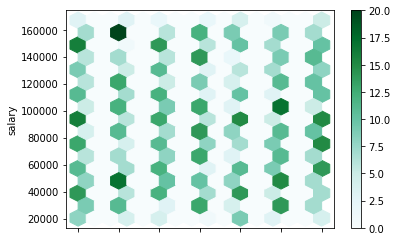

In [12]:
# plot employee salary distribution
import pandas as pd
import matplotlib
%matplotlib inline
#empDF.toPandas().plot.hexbin(x='region_id',y='salary',gridsize=15)
empDF.toPandas().plot.

In [36]:
# reading text files
spark.read.textFile("file:///Users/Neeraj/Documents/Proj/Spark/data/retail-data/by-day/2010-12-01.csv")\
    .show()

AttributeError: 'DataFrameReader' object has no attribute 'textFile'

# RDD - Low level APIs
There are two sets of low-level APIs: there is one for manipulating distributed data (RDDs), and another for distributing and manipulating distributed shared variables (broadcast variables and accumulators).

### You should generally use the lower-level APIs in three situations:

1. You need some functionality that you cannot find in the higher-level APIs; for example, if you need very tight control over physical data placement across the cluster.

2. You need to maintain some legacy codebase written using RDDs.

3. You need to do some custom shared variable manipulation. 

## What is RDD
An RDD represents an immutable, partitioned collection of records that can be operated on in parallel. Unlike DataFrames though, where each record is a structured row containing fields with a known schema, in RDDs the records are just Java, Scala, or Python objects of the programmer’s choosing.

RDDs give you complete control because every record in an RDD is a just a Java or Python object. You can store anything you want in these objects, in any format you want. This gives you great power, but not without potential issues. Every manipulation and interaction between values must be defined by hand, meaning that you must “reinvent the wheel” for whatever task you are trying to carry out. Also, optimizations are going to require much more manual work, because Spark does not understand the inner structure of your records as it does with the Structured APIs. For instance, Spark’s Structured APIs automatically store data in an optimzied, compressed binary format, so to achieve the same space-efficiency and performance, you’d also need to implement this type of format inside your objects and all the low-level operations to compute over it. Likewise, optimizations like reordering filters and aggregations that occur automatically in Spark SQL need to be implemented by hand. For this reason and others, we highly recommend using the Spark Structured APIs when possible.

##### The Partitioner is probably one of the core reasons why you might want to use RDDs in your code. Specifying your own custom Partitioner can give you significant performance and stability improvements if you use it correctly. 

In [44]:
# create RDD
spark.range(10).toDF("id").show()

+---+
| id|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
|  5|
|  6|
|  7|
|  8|
|  9|
+---+



In [49]:
# create RDD from a local collection, use parallelize method
data = "This is a big string with words of type string".split(" ")
words = spark.sparkContext.parallelize(data,2)
words

ParallelCollectionRDD[142] at parallelize at PythonRDD.scala:195

In [51]:
# name the RDD so it shows in spark UI
words.setName("myWords")
words.name()

'myWords'

In [52]:
# create RDD from a data source
myrdd = spark.sparkContext.textFile("file:///Users/Neeraj/Documents/Proj/Spark/data/retail-data/by-day/2010-12-01.csv")
myrdd

file:///Users/Neeraj/Documents/Proj/Spark/data/retail-data/by-day/2010-12-01.csv MapPartitionsRDD[144] at textFile at NativeMethodAccessorImpl.java:0

In [53]:
# read records from rdd
myrdd.take(4)

['InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country',
 '536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom',
 '536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom',
 '536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom']

In [54]:
# distinct words
words.distinct().count()

9

In [61]:
# filtering using functions
def myStartWith(word):
    return word.startswith("s")

print(startWithS("super"))

words.filter(lambda word: not myStartWith(word)).collect()

True


['This', 'is', 'a', 'big', 'with', 'words', 'of', 'type']

In [70]:
# using map
w = words.map(lambda word: (word, word[0], myStartWith(word)))
w.collect()

[('This', 'T', False),
 ('is', 'i', False),
 ('a', 'a', False),
 ('big', 'b', False),
 ('string', 's', True),
 ('with', 'w', False),
 ('words', 'w', False),
 ('of', 'o', False),
 ('type', 't', False),
 ('string', 's', True)]

In [69]:
w.filter(lambda x: x[2]).collect()

[('string', 's', True), ('string', 's', True)]

In [72]:
# flatMap
words.flatMap(lambda w: list(w)).take(10)

['T', 'h', 'i', 's', 'i', 's', 'a', 'b', 'i', 'g']

In [73]:
# sort in descending or reverse order
words.sortBy(lambda s: len(s) * -1).collect()

['string', 'string', 'words', 'This', 'with', 'type', 'big', 'is', 'of', 'a']

In [78]:
# splitting a RDD
splitted = words.randomSplit([0.3, 0.7])
print("1: ",splitted[0].collect())
print("2: ",splitted[1].collect())

1:  ['a', 'with', 'of', 'type']
2:  ['This', 'is', 'big', 'string', 'words', 'string']


In [80]:
# sum of all numbers in a RDD
spark.sparkContext.parallelize(range(1,21)).reduce(lambda x,y:x+y)

210

In [81]:
# get longest word in data rdd
def getLongestWord(l, r):
    if len(l) > len(r):
        return l
    else:
        return r
    
words.reduce(getLongestWord)

'string'

In [82]:
# countByValue - loads entire data into driver's memory and then count value occurences. Avoid it for large datasets
words.countByValue()

defaultdict(int,
            {'This': 1,
             'is': 1,
             'a': 1,
             'big': 1,
             'string': 2,
             'with': 1,
             'words': 1,
             'of': 1,
             'type': 1})

In [84]:
# take - gets values from one partition and then based on how many values are remaining, it fetches from next partition
words.take(5)

['This', 'is', 'a', 'big', 'string']

In [86]:
words.takeOrdered(5)

['This', 'a', 'big', 'is', 'of']

In [87]:
words.top(5)

['words', 'with', 'type', 'string', 'string']

In [88]:
words.getNumPartitions()

2

In [91]:
words.takeSample(withReplacement=False, num=5, seed=3)

['is', 'with', 'words', 'This', 'string']

In [97]:
# saving RDDs in files
words.saveAsTextFile("file:///Users/Neeraj/Downloads/words")
words.map(lambda w: (w, len(w))).saveAsSequenceFile("file:///Users/Neeraj/Downloads/words1")

In [100]:
# cache a RDD in memory
words.cache()
words.collect()
words.getStorageLevel()

StorageLevel(False, True, False, False, 1)

In [102]:
# checkpoint - this feature isn't available in dataset or dataframes. It allows to store a RDD on disk instead of memory
# so it can be accessed later without recomputing.
spark.sparkContext.setCheckpointDir("file:///Users/Neeraj/Downloads/checkpoint")
words.checkpoint()
words.collect()

['This', 'is', 'a', 'big', 'string', 'with', 'words', 'of', 'type', 'string']

In [103]:
# using pipe to invoke external processes. This is great method to invoke existing programs
words.pipe('wc -l').collect()

['       5', '       5']

In [110]:
# it is invoked once per partition as seen in the results
words.pipe('./upperCase.sh').collect()

['Running shell script',
 'THIS',
 'IS',
 'A',
 'BIG',
 'STRING',
 'Running shell script',
 'WITH',
 'WORDS',
 'OF',
 'TYPE',
 'STRING']

In [12]:
# load xml data
# start pyspark as 
# pyspark --packages com.databricks:spark-xml_2.10:0.4.1

#from os import environ
#environ['PYSPARK_SUBMIT_ARGS'] = '--packages com.databricks:spark-xml_2.10:0.4.1 pyspark-shell'

xmlDF = spark.read.format("xml")\
        .options(rowTag="book")\
        .load("file:///Users/Neeraj/Documents/Proj/Spark/data/books.xml")

In [15]:
xmlDF.show()

+-----+--------------------+--------------------+---------------+-----+------------+--------------------+
|  _id|              author|         description|          genre|price|publish_date|               title|
+-----+--------------------+--------------------+---------------+-----+------------+--------------------+
|bk101|Gambardella, Matthew|An in-depth look ...|       Computer|44.95|  2000-10-01|XML Developer's G...|
|bk102|          Ralls, Kim|A former architec...|        Fantasy| 5.95|  2000-12-16|       Midnight Rain|
|bk103|         Corets, Eva|After the collaps...|        Fantasy| 5.95|  2000-11-17|     Maeve Ascendant|
|bk104|         Corets, Eva|In post-apocalyps...|        Fantasy| 5.95|  2001-03-10|     Oberon's Legacy|
|bk105|         Corets, Eva|The two daughters...|        Fantasy| 5.95|  2001-09-10|  The Sundered Grail|
|bk106|    Randall, Cynthia|When Carla meets ...|        Romance| 4.95|  2000-09-02|         Lover Birds|
|bk107|      Thurman, Paula|A deep sea diver .